<h1>Analysis of the computer games market. Forecasts for the next year</h1>

<h2>Project Description</h2>


Online store "Streamchick", which sells computer games worldwide, plans to make a strategy for 2017. For this purpose, historical data on game sales, user and expert evaluations, genres and platforms were taken from open sources. I need to identify the patterns that determine the success of a game in order to bet on a potentially popular product and plan advertising campaigns.

<h2>Purpose of the study</h2>

The purpose of this study is to identify the patterns that determine the success of the game in order to predict a successful product and prepare a marketing plan

<h2>Objectives of the study</h2>

1. Data preprocessing - we need to get rid of duplicates, correct anomalies and adjust data types - prepare the data for further work  
2. exploratory analysis - to understand the main factors affecting game sales, as well as identifying the actual period, the data on which, will help us form assumptions about the following years  
3. Creating a user portrait. Let's look at the top 5 platforms in all regions to better understand all types of audiences and make the right choices for next year.  
4. Testing two hypotheses:  
   4.1 The average user ratings of Xbox One and PC platforms are the same   
   4.2 The average user ratings of Action and Sports genres are different  
5. Summarizing, Conclusion and Forecast for 2017

<h2>Data description</h2>

Name - game name  
Platform - platform  
Year_of_Release - year of release  
Genre - game genre  
NA_sales - North American sales (millions of copies sold)  
EU_sales - sales in Europe (millions of copies sold)  
JP_sales - sales in Japan (millions of copies sold)  
Other_sales - sales in other countries (millions of copies sold)  
Critic_Score - critics' score (maximum 100)  
User_Score - user rating (maximum 10)  
Rating - rating from the organization ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.

<h2>Project Plan</h2>

**This study will be divided into several parts.**

***Part 1: Importing Libraries:***
* [1. Import all the libraries needed for the study](#import)

***Part 2. Loading data and examining general information:***
* [1. Upload CSV file](#upload)
* [2. View general information.](#general)
* [3. First 5 rows output](#first_rows)
* [4. Intermediate output](#first_conclusion)

***Part 3. Data preparation:***
* [1. Upload CSV file](#upload)
* [2. View general information](#general)
* [3. First 5 rows output](#first_rows)
* [4. Intermediate output](#second_conclusion)

***Part 4. Data preprocessing:***
* [1. Lowercase headers](#strlow)
* [2. Data type conversion](#data_type)
* [3. Duplicate processing](#duplicates)
* [4. Handling misses](#missed)
* [5. Check for misses](#check)
* [6. Find total sales](#total_sales)
* [7. Conclusion](#conclusion2)

***Part 5. Exploratory Data Analysis:***
* [1. Number of games released in each year.](#total_games)
* [2. Sales variation for top platforms.](#change)
* [3. Sales variance for top platforms](#boxplot)
* [4. Impact of critic scores on sales for PS4](#critic_score)
* [5. Impact of player ratings on PS4 sales](#user_score)
* [6. Impact of critic scores on sales for other platforms](#critic_score_other)
* [7. Impact of player ratings on sales for other platforms](#user_score_other)
* [8. Game sales by genre](#genre_sales)
* [9. User portraits](#user_portrait)
* [10. Sales by genre](#top_genres)
* [11. Sales by ESRB rating](#esrb)

***Part 6. Hypotheses:***
* [1. Average user ratings of Xbox One and PC platforms are the same](#h1)
* [2. The average user ratings of Action and Sports genres are different](#h2).

***Part 7. General Conclusion:***
* [1. Data loading and preprocessing.](#preprocessing)
* [2. Exploratory data analysis.](#research)
* [3. Portraits of users by region.](#portrait)
* [4. Hypothesis testing.](#hyp)
* [5. Conclusion.](#final_concl)

 <a id = "import"></a>
 # Importing libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Data loading

<a id = 'upload'> </a>
## File loading

In [42]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

<a id = 'general'> </a>
##  Study of general information

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a id = 'first_rows'> </a>
##  Output first rows

In [44]:
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id = 'first_conclusion'> </a>
Gaps are present and the data type needs to be corrected

# Data preprocessing

<a id = 'strlow'> </a>
## Lowercase all column headings

In [45]:
data.columns = data.columns.str.lower()

<a id = 'data_type'> </a>
## Data type conversion

### Changing data types

#### Changing year_of_release (float to int)

In [46]:
data['year_of_release'].fillna(-1, inplace = True)
data['year_of_release'] = data['year_of_release'].astype(int)

Year is an integer. The dataset initially defines the year data type as a real number => replace float with int

#### Changing user_score (object to float)

In [47]:
data.loc[data['user_score']=='tbd'] = np.nan
data['user_score'] = data['user_score'].astype(float)

'tbd' - values that will be added in the future. At the moment of the study they are missing -> replace with nan and continue without them.   
user_score represents the evaluation of users in real numbers -> data type object is not suitable in this case, replace with flaot

<a id = 'duplicates'> </a>
## Duplicates

### Full duplicates

#### Duplicate search

In [48]:
print(data.duplicated().sum())

2423


#### Deleting duplicates

In [49]:
data = (data.drop_duplicates()).reset_index()

#### Checking

In [50]:
print(data.duplicated().sum())

0


All complete duplicates have been removed

### Implicit duplicates

Implicit duplicates can be in the following columns:  
    name  
    platform  
    genre  
    rating  
The remaining columns are numeric values, among which there can be no implicit duplicates

In [51]:
potential_duplicates = ['name', 'platform', 'genre', 'rating']

No implicit duplicates detected - move on

<a id = 'missed'> </a>
## Pass processing

Possible reasons for omissions:  
1. technical failure, because of which part of the data was lost  
2. absence of data initially 
3. In the case of rating - there are risks that the company evaluating the age category of users has not considered all games or only those available in the U.S. and Canada (the main geography of the company)
    
How we fix the omissions:
1. critic_score and other_sales - we leave NaN in order not to spoil the statistics in separate periods, because during 20 years there were changes and the median can spoil the statistics for conditional 2010-2015.
2. name, platform, genre, rating - we fill them with the value “Not Found” in order to be able to display them at the stage of research analysis and not to lose them.
3. na_sales, eu_sales и т.д - пропуски в одной строке. Such a row is of no use to us - delete it.
        
tbd in a column in user_score - will be defined. Reasons for this - the game was released recently and users have not had time to evaluate the game, or the evaluations have not been processed yet. We replace such values with Not Found, so that it will be possible to take them into account later in the study

### Total number of absences

In [52]:
data.isna().sum()

index                 0
name                  3
platform              1
year_of_release       1
genre                 3
na_sales              1
eu_sales              1
jp_sales              1
other_sales           1
critic_score       7237
user_score         6702
rating             6717
dtype: int64

Further work with skips:   
<b>name, platform, genre, rating</b> - fill with empty “Not Found” value, as there is no possibility to find something averaged among other values, and we can't delete these strings, as they carry other valuable information.  
<b>na_sales, eu_sales, jp_sales, other_sales</b> - all of them have exactly 1 skip, it is suspected that all skips are in one line (let's check)  
<b>critic_score, user_score</b> - fill with median or mean, depending on the distribution   
Possible causes:  
1. technical problems

### Check string with missing value in na_sales

In [53]:
print(data[data['na_sales'].isna()])
data.info()

     index name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
119    119  NaN      NaN              NaN   NaN       NaN       NaN       NaN   

     other_sales  critic_score  user_score rating  
119          NaN           NaN         NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14292 entries, 0 to 14291
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            14292 non-null  int64  
 1   name             14289 non-null  object 
 2   platform         14291 non-null  object 
 3   year_of_release  14291 non-null  float64
 4   genre            14289 non-null  object 
 5   na_sales         14291 non-null  float64
 6   eu_sales         14291 non-null  float64
 7   jp_sales         14291 non-null  float64
 8   other_sales      14291 non-null  float64
 9   critic_score     7055 non-null   float64
 10  user_score       7590 non-null   float64
 11  rating           7575

As we can see there is an empty line in the dataset - delete it.  
Possible causes:  
1. technical failure  

### Deleting an empty string

In [54]:
data = data.query('na_sales >=-1')

### Filling name, platform, genre. rating

In [55]:
data['name'] = data['name'].fillna('Not Found')
data['platform'] = data['platform'].fillna('Not Found')
data['genre'] = data['genre'].fillna('Not Found')
data['rating'] = data['rating'].fillna('Not Found')

<a id = 'check'> </a>
## Checking after pass processing

In [56]:
print(data.isna().sum())

index                 0
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7236
user_score         6701
rating                0
dtype: int64


<a id = 'total_sales'> </a>
## Search for the amount of sales from all regions

In [57]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 'columns')

<a id = 'conclusion2'></a>
## Conclusion

In the received dataset there were wrong data types, omissions, duplicates. All of this has been corrected at this stage.  
More details:  
Column omissions:  
name, platform, rating, genre - the category of data that we cannot calculate and choose something average, so we fill the data with “stub” “Not Found” - so we don't lose valuable information, which is carried by rows in other columns, and also keep the possibility to display data about rows without information in the research analysis  
critic_score, user_score - we leave NaN because of changing user behavior, average values, medians and so on can spoil our research, so it is better to leave empty. We also can't delete data because of important information in other columns.  
What are the reasons for these omissions?  
name, platform, genre - technical failure/error of the person who created the dataset.  
rating - the rating company is responsible for products on the US and Canadian markets, so some games may not get their rating because they are not sold in the US, or the game has no rating. 

# Exploratory data analysis

<a id = 'total_games'> </a>
## Number of games released in each year

In [58]:
games_per_year = data.drop_duplicates(subset = ['year_of_release', 'name'])
games_per_year = games_per_year['year_of_release'].value_counts().reset_index()
display(games_per_year)

,year_of_release,count
0,2008.0,818
1,2007.0,762
2,2009.0,734
3,2006.0,697
4,2010.0,683
5,2011.0,655
6,2005.0,601
7,2002.0,506
8,2003.0,500
9,2004.0,496


### Graphical display of data

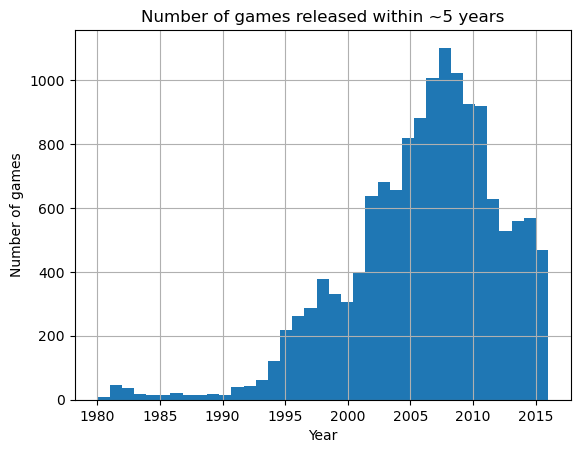

In [59]:
data[data['year_of_release']>0]['year_of_release'].hist(bins = (data[data['year_of_release']>0]['year_of_release'].nunique()))
plt.title('Number of games released within ~5 years')
plt.ylabel('Number of games')
plt.xlabel('Year')
plt.show()

<b>Intermediate conclusion: </b>  
The growth of created games from 1990 to 2010 can be explained by the fact that technology was developing, becoming more accessible to society, as a consequence a great demand for entertainment - games was formed, which developers tried to close. The decline can be explained by higher standards of games from users => users start expecting better, more thoughtful games. This complicates the development process => fewer games start to appear on the market, but they are much more complex in terms of development.  


<a id = 'change'> </a>
## Sales changes in the most popular platforms

### Identify the platforms with the highest total sales in each year (top 12)

In [60]:
top_platforms = (data.query('year_of_release >= 10')[['platform', 'total_sales']]
.groupby(['platform'])
.agg({'total_sales': 'sum'})
.sort_values(by = 'total_sales', ascending = False)).head(12)

### Let's get a list of the top platforms

In [61]:
top_platforms_list = top_platforms.index

### Get an initial dataset ONLY with top platforms

In [62]:
top_12_platforms = data.query('year_of_release >= 10')[data['platform'].isin(top_platforms_list)]
display(top_12_platforms)

C:\Users\Artem\AppData\Local\Temp\ipykernel_19240\3619648299.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_12_platforms = data.query('year_of_release >= 10')[data['platform'].isin(top_platforms_list)]


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not Found,31.38
5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Not Found,30.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14285,16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Not Found,0.01
14286,16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,Not Found,0.00
14287,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not Found,0.01
14288,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Not Found,0.01


### Let's draw a graph

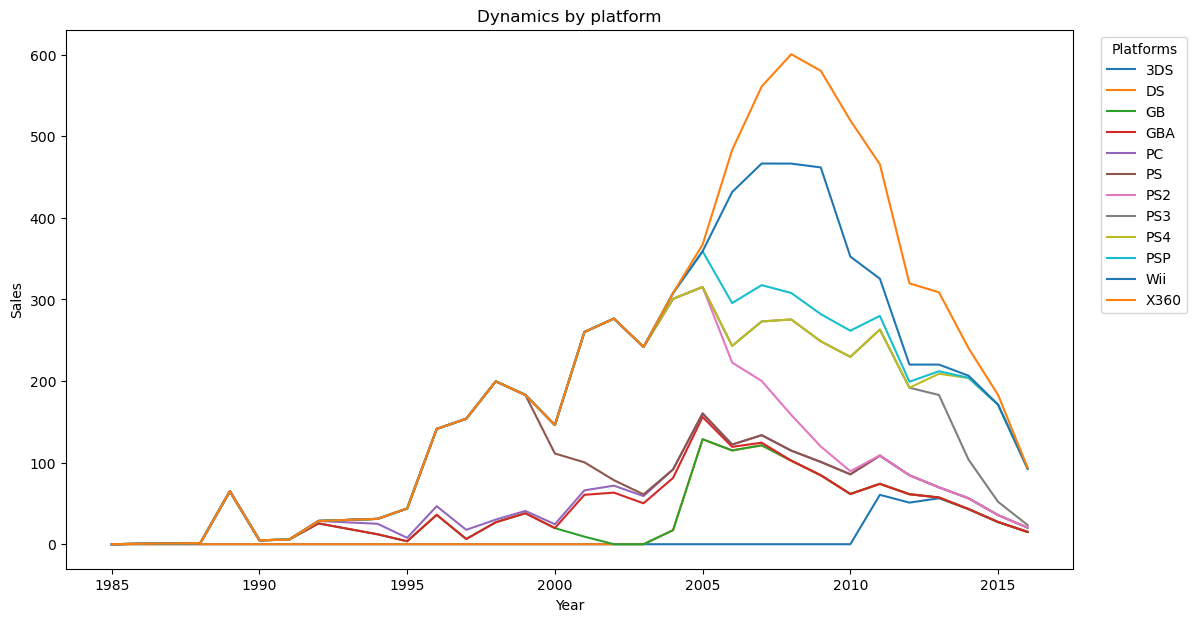

In [63]:
pd.pivot_table(top_12_platforms, 
               index = ['year_of_release'], 
               values = 'total_sales', 
               columns = 'platform', 
               aggfunc = 'sum').plot(kind = 'line', stacked = True, figsize = (13,7),
                title = 'Dynamics by platform', ylabel = 'Sales', xlabel = 'Year').legend(loc = 'upper right', 
                bbox_to_anchor = (1.12, 1), title = 'Platforms')
plt.show()

Conclusion: game sales have been falling in recent years. Many consoles were at their peak in 2005-2010, as the early conclusions suggested

### Create a table with all the top platforms

In [64]:
top_platforms = pd.DataFrame()
top_platforms['number'] = [1,2,3,4,5]
for n in range(1995, 2007):
    current_year = (data.query('year_of_release == @n')
                    .groupby(by = 'platform')
                    .agg({"total_sales": "sum"})
                    .sort_values(by = 'total_sales', ascending = False)
                    .reset_index()
                    .head())
    top_platforms[n] = current_year['platform']
display(top_platforms)    


,number,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,1,PS,PS,PS,PS,PS,PS,PS2,PS2,PS2,PS2,PS2,Wii
1,2,SNES,GB,N64,N64,N64,PS2,GBA,GBA,XB,GBA,DS,DS
2,3,SAT,N64,PC,GB,GB,N64,PS,GC,GBA,XB,XB,PS2
3,4,PC,SNES,SAT,SAT,DC,GB,GC,XB,GC,GC,PSP,PSP
4,5,GB,PC,GB,DC,PC,DC,XB,PC,PC,DS,GBA,X360


In [65]:
top_platforms = pd.DataFrame()
top_platforms['number'] = [1,2,3,4,5,6,7,8]
for n in range(2007, 2017):
    current_year = (data.query('year_of_release == @n')
                    .groupby(by = 'platform')
                    .agg({"total_sales": "sum"})
                    .sort_values(by = 'total_sales', ascending = False)
                    .reset_index()
                    .head(8))
    top_platforms[n] = current_year['platform']
display(top_platforms)    
print(top_platforms.nunique())

,number,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1,Wii,Wii,Wii,X360,PS3,PS3,PS3,PS4,PS4,PS4
1,2,DS,X360,PS3,PS3,X360,X360,X360,XOne,XOne,XOne
2,3,X360,PS3,X360,Wii,3DS,3DS,3DS,PS3,3DS,3DS
3,4,PS3,DS,DS,DS,Wii,PC,PS4,3DS,PS3,PC
4,5,PS2,PS2,PSP,PSP,PC,Wii,WiiU,X360,WiiU,WiiU
5,6,PSP,PSP,PS2,PC,PSP,WiiU,XOne,WiiU,X360,PSV
6,7,PC,PC,PC,PS2,DS,PSV,PC,PC,PC,PS3
7,8,GBA,XB,NaN,NaN,PSV,DS,PSV,PSV,PSV,X360


number    8
2007      8
2008      8
2009      7
2010      7
2011      8
2012      8
2013      8
2014      8
2015      8
2016      8
dtype: int64


Let's look at the table with the platforms for which games generated the most revenue.  
Let's look at the period from 1995 to 2000. We can see that for 6 years ps games were with the highest demand.  
Now let's turn to the period from 2011 to 2016. In these years we can see that the first 3 years the ps3 was popular and the remaining 3 years the ps4. 
This shows that in recent years decent alternatives are appearing more often than they used to.

Many platforms have been in the top 5 for about 7-9 years => we can consider the period from 2012 to 2016 as relevant, so we will have a chance to see all the platforms that are likely to go down in the near future 

In [66]:
actual_data = data.query('year_of_release >= 2012')

### Let's study the period relevant to us

In [67]:
top_platforms = pd.DataFrame()
top_platforms['number'] = [1,2,3,4,5,6,7,8]
for n in range(2012, 2017):
    current_year = (actual_data.query('year_of_release == @n')
                    .groupby(by = 'platform')
                    .agg({"total_sales": "sum"})
                    .sort_values(by = 'total_sales', ascending = False)
                    .reset_index()
                    .head(8))
    top_platforms[n] = current_year['platform']
display(top_platforms)    

,number,2012,2013,2014,2015,2016
0,1,PS3,PS3,PS4,PS4,PS4
1,2,X360,X360,XOne,XOne,XOne
2,3,3DS,3DS,PS3,3DS,3DS
3,4,PC,PS4,3DS,PS3,PC
4,5,Wii,WiiU,X360,WiiU,WiiU
5,6,WiiU,XOne,WiiU,X360,PSV
6,7,PSV,PC,PC,PC,PS3
7,8,DS,PSV,PSV,PSV,X360


In recent years, the following have been falling in sales:  
1. PS3   
2. X360  
3. WII   
In recent years, sales have increased for:  
1. PS4   
2. XONE  
3. PC  
4. wiiu  
5. 3DS  

Potentially favorable platforms:  
For the last three years ps4, xone and 3DS have steadily occupied the 1st and 2nd places, if the manufacturers of these consoles do not plan to release new versions, we can assume that in 2017 both platforms will continue to occupy these positions, as the main audience of game lovers is focused on them, and even if a competitive alternative comes out, it will take a few years for people to switch from PS4, XONE and 3DS to the novelty.   

Let's also pay attention to the position of PC in 2000-2012, after a long stagnation PC started to gain popularity. In 2013-2016 there is a similar situation, when PC sharply gaining popularity in 2016, which may be due to improved optimization of the platform, if this is indeed the case, the interest of users will continue to grow.  

Also in favor of PC can play the fact that new products are released most often first on PS4, XONE consoles and only a few years later appear for PC. Taking into account that PS4 games have been popular for the last three years, we can assume that a cult game has been released, which will soon appear on PC

3DS - handheld console, few analogs => remains popular


<h4>Based on this, let's summarize the list of the best platforms for 2017 (prioritized):</h4>

1. PS4  
2. XONE  
3. PC  
4. 3DS

<a id = 'boxplot'> </a>
##  Boxplot on global sales for all platforms</h4>

### The boxed version

#### Top platforms in the current period

In [68]:
top_platforms = (actual_data[['platform', 'total_sales']]
.groupby(['platform'])
.agg({'total_sales': 'sum'})
.sort_values(by = 'total_sales', ascending = False)).head(12)

#### Top platforms list

In [69]:
platforms = top_platforms.head().index
print(platforms)
data_to_plot = [actual_data[actual_data['platform'] == platform]['total_sales'] for platform in platforms]

Index(['PS4', 'PS3', 'X360', '3DS', 'XOne'], dtype='object', name='platform')


#### Visualization with drawers

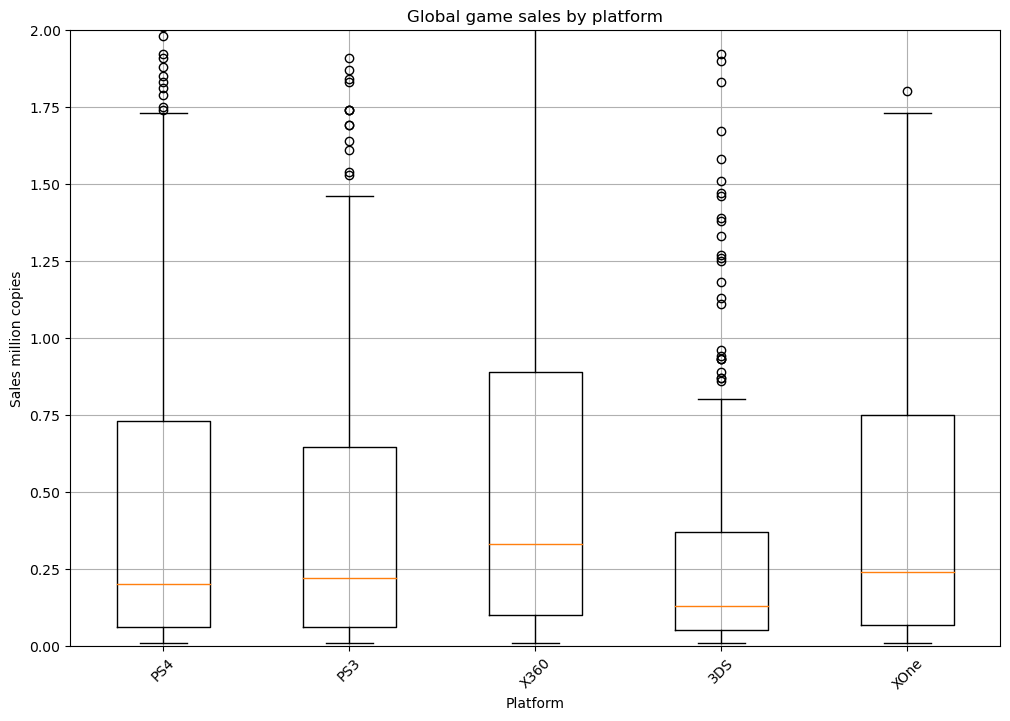

In [70]:
plt.figure(figsize = (12,8))
plt.boxplot(data_to_plot, labels = platforms)
plt.title('Global game sales by platform')
plt.ylabel('Sales million copies')
plt.xlabel('Platform')
plt.ylim(0,2)
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

#### Visualization with all emissions

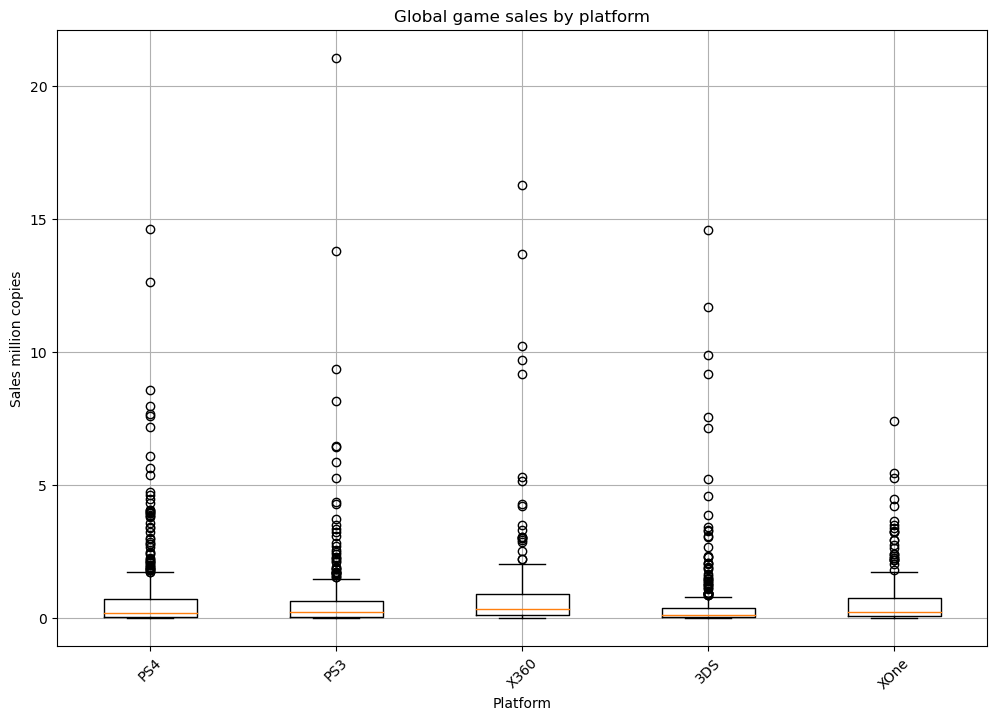

In [71]:
plt.figure(figsize = (12,8))
plt.boxplot(data_to_plot, labels = platforms)
plt.title('Global game sales by platform')
plt.ylabel('Sales million copies')
plt.xlabel('Platform')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

The most popular console from 2012 to 2016 was the X360, the most popular game sold was on PS3, less popular was 3D, PS4 had the most “outliers”

<a id = 'critic_score'> </a>
##  How critics' scores affect game sales on the PS4's most popular platform

### Scatter plot

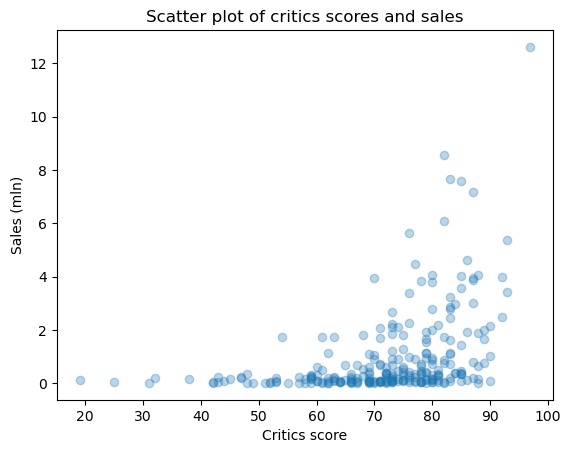

In [72]:
ps4_data = data.query('(platform == "PS4") & (year_of_release >= 2012)')
plt.scatter(y = ps4_data['total_sales'], x = ps4_data['critic_score'], alpha = 0.3)
plt.xlabel('Critics score')
plt.ylabel('Sales (mln)')
plt.title('Scatter plot of critics scores and sales')
plt.show()


### Correlation

In [73]:
print("Correlation of total game sales and critics' scores", ps4_data['total_sales'].corr(ps4_data['critic_score']))

Correlation of total game sales and critics' scores 0.4064685741971657


<b> Intermediate conclusion: </b> 

As we can see, scores have a positive correlation (not too close to 0) with the number of copies of the game sold, which means: the higher the score, the more likely more games will be sold. 

<a id = 'user_score'> </a>
## How player ratings affect game sales on the PS4's most popular platform

### Scatter plot

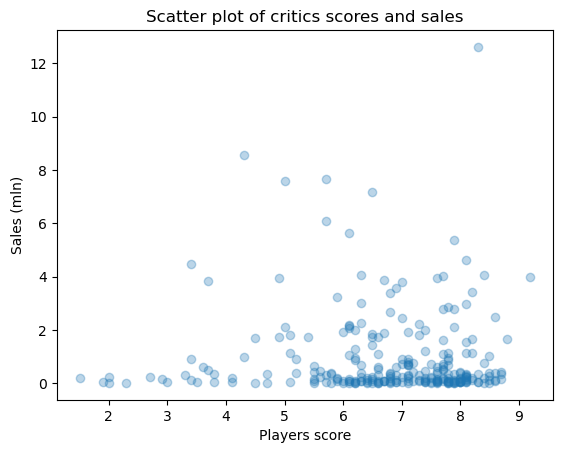

In [74]:
plt.scatter(y = ps4_data['total_sales'], x = ps4_data['user_score'], alpha = 0.3)

plt.xlabel('Players score')
plt.ylabel('Sales (mln)')
plt.title('Scatter plot of critics scores and sales')
plt.show()


### Correlation

In [75]:
print("Correlation of total game sales and player evaluations", ps4_data['total_sales'].corr(ps4_data['user_score']))

Correlation of total game sales and player evaluations -0.031957110204556376


<b> Intermediate conclusion: </b> 

The correlation between sales and player ratings is approximately 0 (-0.04), so we conclude that user ratings have almost no effect on the number of copies sold

Critics' ratings show a direct, medium-weak correlation with the number of sales. User ratings have no correlation with sales

<a id = 'critic_score_other'> </a>
## How critics' scores affect game sales on other platforms (PC and 3DS)

### Scatter plot

#### PC

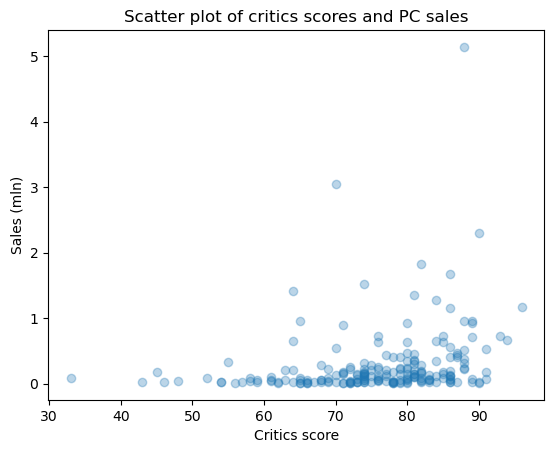

In [76]:
pc_data = data.query('(platform == "PC") & (year_of_release >= 2012)')
plt.scatter(y = pc_data['total_sales'], x = pc_data['critic_score'], alpha = 0.3)
plt.xlabel('Critics score')
plt.ylabel('Sales (mln)')
plt.title('Scatter plot of critics scores and PC sales')
plt.show()

#### 3DS

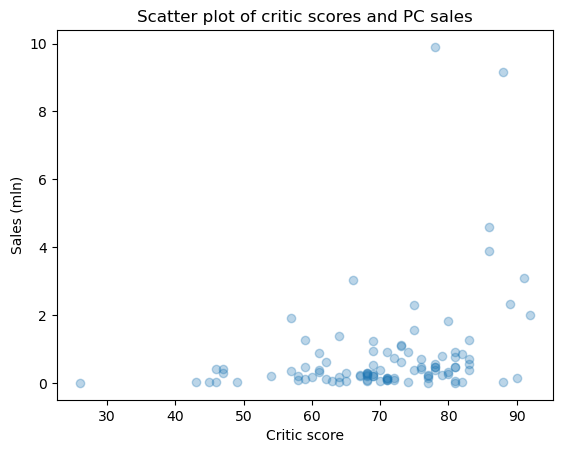

In [77]:
ds_data = data.query('(platform == "3DS") & (year_of_release >= 2012)')
plt.scatter(y = ds_data['total_sales'], x = ds_data['critic_score'], alpha = 0.3)
plt.xlabel('Critic score')
plt.ylabel('Sales (mln)')
plt.title('Scatter plot of critic scores and PC sales')
plt.show()

### Correlation

#### PC

In [78]:
print("Correlation of total game sales and PC critics' scores", pc_data['total_sales'].corr(pc_data['critic_score']))

Correlation of total game sales and PC critics' scores 0.23724324311567918


#### 3DS

In [79]:
print("Correlation of total game sales and 3DS critics' scores", ds_data['total_sales'].corr(ds_data['critic_score']))

Correlation of total game sales and 3DS critics' scores 0.31055301915326294


We verify that critics' scores show a direct, medium-weak correlation with the number of sales.

<a id = 'user_score_other'> </a>
## How player ratings affect game sales on other platforms (PC and 3DS)

### Scatter plot

#### PC

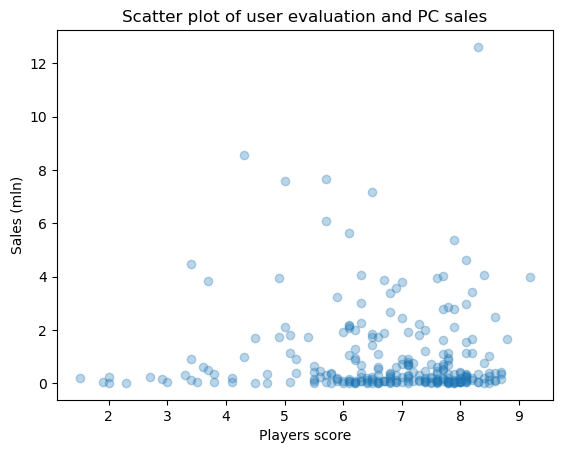

In [80]:
plt.scatter(y = ps4_data['total_sales'], x = ps4_data['user_score'], alpha = 0.3)

plt.xlabel('Players score')
plt.ylabel('Sales (mln)')
plt.title('Scatter plot of user evaluation and PC sales')
plt.show()


#### 3DS

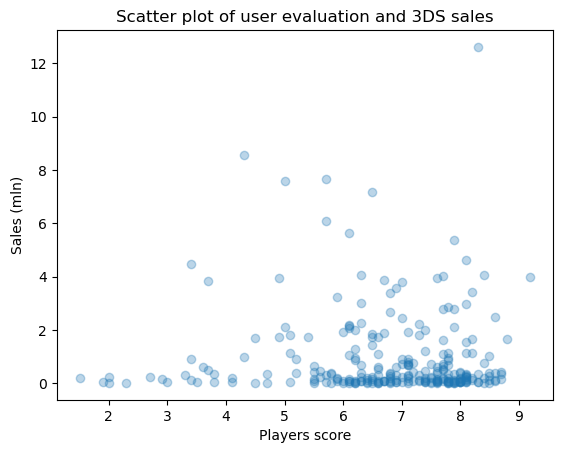

In [81]:
plt.scatter(y = ps4_data['total_sales'], x = ps4_data['user_score'], alpha = 0.3)

plt.xlabel('Players score')
plt.ylabel('Sales (mln)')
plt.title('Scatter plot of user evaluation and 3DS sales')
plt.show()


### Correlation

#### PC

In [82]:
print("Correlation of total game sales and PC user ratings", pc_data['total_sales'].corr(pc_data['user_score']))

Correlation of total game sales and PC user ratings -0.12186747630735577


#### 3DS

In [83]:
print("Correlation of overall game sales and 3DS user ratings", ds_data['total_sales'].corr(ds_data['user_score']))

Correlation of overall game sales and 3DS user ratings 0.19758263411038596


Realize that user reviews may have a weak correlation with sales

Conclusion: critics' reviews have a weak-to-moderate correlation. User reviews may have a weak correlation, may have no correlation

<a id = 'genre_sales'> </a>
## Distribution of games by genre

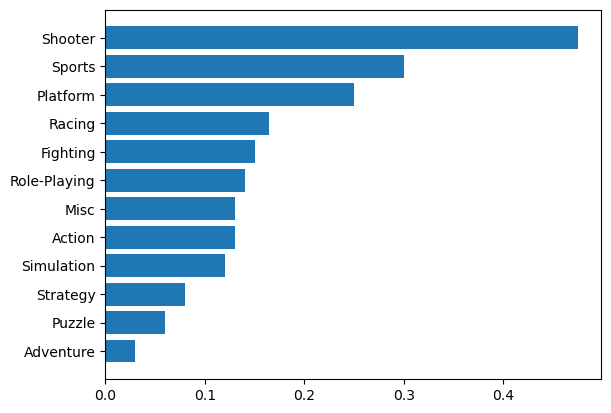

In [84]:
genre_data = actual_data.groupby('genre').agg({'total_sales': 'median'}).query('genre != "Not Found"').reset_index().sort_values(by = 'total_sales')
plt.barh(y = genre_data['genre'], width = genre_data['total_sales'])
plt.show()

As a result of comparing the average number of sold copies of a game, we can see which genres are more and less interesting to users:  <br> 
Interesting:    <br>
1. Shooters   <br>
2. Sports  <br>
3. Platform   <br>

Not interesting: <br>
1. Strategy  <br>
2. Puzzle   <br>
3. Adventure  <br>


<a id = 'user_portrait'> </a>
## User portrait

### Top 5 platforms</h3>

#### Obtaining the top 5 most popular platforms among users between 2012 and 2016

In [85]:
platform_sales = (actual_data
                  .groupby('platform')
                  .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})
                  .reset_index())

#### A breakdown of the top 5 most popular platforms among users between 2012 and 2016 by region

In [86]:
na_top_platforms = platform_sales.sort_values(by = 'na_sales', ascending = False).head()[['platform', 'na_sales']]
eu_top_platforms = platform_sales.sort_values(by = 'eu_sales', ascending = False).head()[['platform', 'eu_sales']]
jp_top_platforms = platform_sales.sort_values(by = 'jp_sales', ascending = False).head()[['platform', 'jp_sales']]

#### Graphical representation

<h5>North America</h5>

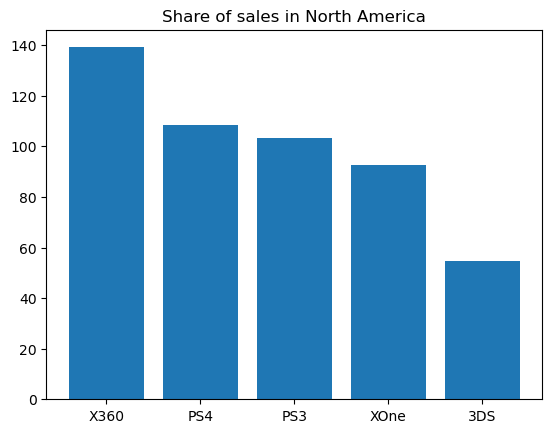

In [87]:
plt.bar(height = na_top_platforms['na_sales'], x = na_top_platforms['platform'])
plt.title('Share of sales in North America')
plt.show()

<h5>Europe</h5>

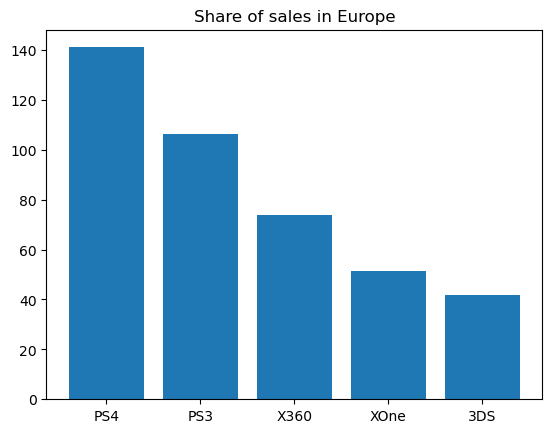

In [88]:
plt.bar(height = eu_top_platforms['eu_sales'], x = eu_top_platforms['platform'])
plt.title('Share of sales in Europe')
plt.show()

<h5>Japan</h5>

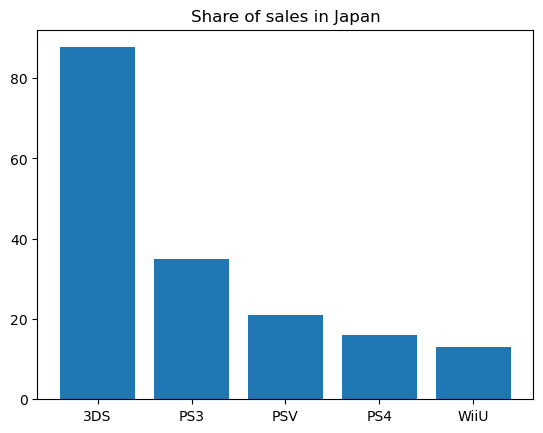

In [89]:
plt.bar(height = jp_top_platforms['jp_sales'], x = jp_top_platforms['platform'])
plt.title('Share of sales in Japan')
plt.show()

<b> Intermediate conclusion: </b> 

The analysis is based on observations from 2008 to 2016, as this period is considered relevant in this study  
There are significant differences in the interests of users from different regions. Americans and Europeans have the same platforms in the top 3, but with different shares. Japan's audience is very different from America and Europe.  
The biggest platforms are:  
America - x360  
Europe - ps3  
Japan - 3ds  
Smallest platforms:
America - ps4  
Europe - pc  
Japan - wii  


<a id = 'top_genres'> </a>
## Top 5 genres

### Obtaining statistics on total sales of games of individual genres in all regions

In [90]:
genre_region = (actual_data
                  .groupby('genre')
                  .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})
                  .reset_index())

### Dataset partitioning 

In [91]:
na_top_genres = genre_region.sort_values(by = 'na_sales', ascending = False)[['genre', 'na_sales']].head()
eu_top_genres = genre_region.sort_values(by = 'eu_sales', ascending = False)[['genre', 'eu_sales']].head()
jp_top_genres = genre_region.sort_values(by = 'jp_sales', ascending = False)[['genre', 'jp_sales']].head()

### Displaying tables

In [92]:
display(na_top_genres, eu_top_genres, jp_top_genres)

,genre,na_sales
0,Action,176.39
8,Shooter,144.64
10,Sports,81.13
7,Role-Playing,64.00
3,Misc,36.90


,genre,eu_sales
0,Action,157.51
8,Shooter,113.33
10,Sports,68.69
7,Role-Playing,48.53
6,Racing,27.19


,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.33
3,Misc,12.86
9,Simulation,10.35
2,Fighting,9.41


<b> Intermediate conclusion: </b> 

The interests of the American and European audiences are almost identical, except for the 4th and 5th places (they differ in places).  
Japan's audience is different again.  
Top genres for America and Europe:  
Action. shooter, sports  
Top genres for Japan:  
role-playing, action, misc


<a id = 'esrb'> </a>
## Does the ESRB have an impact on sales?

In [93]:
esrb_grouped_data = (actual_data
                     .groupby(by = 'rating')
                     .agg({'na_sales': 'sum','eu_sales': 'sum', 'jp_sales': 'sum'})
                     .reset_index())

### Dataset partitioning 

In [94]:
na_esrb = esrb_grouped_data.sort_values(by = 'na_sales', ascending = False)[['rating', 'na_sales']]
eu_esrb = esrb_grouped_data.sort_values(by = 'eu_sales', ascending = False)[['rating', 'eu_sales']]
jp_esrb = esrb_grouped_data.sort_values(by = 'jp_sales', ascending = False)[['rating', 'jp_sales']]

In [95]:
display(na_esrb, eu_esrb, jp_esrb)

,rating,na_sales
2,M,231.47
0,E,112.92
3,Not Found,103.27
1,E10+,73.29
4,T,65.80


,rating,eu_sales
2,M,193.94
0,E,110.95
3,Not Found,91.24
4,T,52.82
1,E10+,52.48


,rating,jp_sales
3,Not Found,108.84
0,E,28.09
4,T,25.55
2,M,21.20
1,E10+,8.06


<b> Intermediate conclusion: </b> 

The ESRB rating affects sales in America and Europe almost equally, the ratings are prioritized by user interests:  
1. m  
2. e  
3. not Found  
4. e10+ / t
5. t / e10+

Users from Japan have different interests:  
1. Not Found  
2. e
3. t  
4. m  
5. e10+    

Not Found's leadership in Japan can be explained by the presence of local games, which are not processed by ESRB, in the Asian market

# Hypothesis testing

<a id = 'h1'></a>
## 1. The average user ratings of the Xbox One and PC platforms are the same</h3>

H0 - average user ratings of both platforms are equal  
H1 - average user ratings of the platforms are not equal (two-sided alternative hypothesis)

### Dataset creating

In [96]:
xbox_user_score = data.query('(year_of_release >= 2012 ) & (user_score > 0) & (platform == "x360" | platform == "xone")')['user_score']
pc_user_score = data.query('(year_of_release >= 2012 ) & (user_score > 0) & (platform == "pc")')['user_score']

### Hypothesis testing

In [97]:
alpha = 0.05
result = scipy.stats.ttest_ind(xbox_user_score, pc_user_score)
if(result.pvalue < alpha):
    print("H0 refuted => average user ratings of XBOX and PC are not equal!")
else:
    print("H1 is not refuted => average user ratings of XBOX and PC are equal!")

H1 is not refuted => average user ratings of XBOX and PC are equal!


<b> Intermediate concluison: </b> 

Since we are comparing two independent datasets, we use scipy.stats.ttest_ind(). alpha is set to 0.05. 
After comparing pvalue and alpha, we realize that the average values of user ratings are equal to

<a id = 'h2'></a>
## 2. The average user ratings for the Action and Sports genres are different.

H0 - average user ratings of both genres are equal  
H1 - average user ratings of both genres are not equal (two-sided alternative hypothesis)

### Dataset creating

In [98]:
action_user_score = data.query('(year_of_release >= 2012 ) & (genre == "action") & (user_score > 0)')['user_score']
sports_user_score = data.query('(year_of_release >= 2012 ) & (genre == "sports") & (user_score > 0)')['user_score']

### Hypothesis testing

In [99]:
alpha = 0.05
result = scipy.stats.ttest_ind(action_user_score, sports_user_score)
if(result.pvalue < alpha):
    print("H0 refuted => average user ratings of the two genres are not equal!")
else:
    print("H1 is not refuted => average user ratings of the two genres are equal!")

H1 is not refuted => average user ratings of the two genres are equal!


<a id = 'concl'></a>
<b> Intermediate conclusion: </b> 

Since we are comparing two independent datasets, we use scipy.stats.ttest_ind(). alpha is set to 0.05. 
After comparing pvalue and alpha, we realize that the average user ratings of the two genres are not equal

# General conslusion  

<a id = "prepocessing"> </a>
## Data loading and preprocessing

While examining the general information about the dataset, we found omissions as well as incorrect data types.  

Gaps in the columns (rating, genre, name, platform) where we cannot find the average value were filled with empty values, which in the next steps helped us to ignore the rows with gaps. We can't delete these rows, as we would lose other valuable information.  
The gaps in other columns (user_score, critic_score) were filled with mean values, as these data had a normal distribution.

Incorrect data types were corrected:  
year_of_release (float - int)  
user_score (object - float)

The work at this stage was done without any problems

<a id = "research"> </a>
<h2>Research Data Analysis</h2>

At this stage, an exploratory analysis of the data was conducted, identifying relevant timeframes to study, popular and up-and-coming platforms, the impact of reviews on game sales, and sales by genre

<h4>Game launches by year:</h4>  
Games started selling massively in 1990. Sales peaked between 2010 and 2015  

<h4>Sales by platform:</h4>  
The life of the platform (the period from appearance to disappearance from the top) - 7-9 years were revealed. In recent years, these terms have become shorter due to the rapid development of technology and frequent appearance of competing platforms. 

The study of platforms helped us to identify promising platforms for the next year:  
1. PS4 (the top platform that holds the majority of game fans, even if a decent analog comes out it will take years for them to leave PS4)
2. XONE (the top platform that holds the majority of game fans, even if a decent analog comes out it will take years for them to leave XONE)
3. PC (developing platform, release of iconic games from 2010-2016 on console, soon release on PC => influx of large number of customers)
4. 3DS (no worthy analogs, very popular in Japan)

<h4>Impact of reviews on sales:</h4>  
Critic reviews do have an impact on sales (corr ~ 0.34), but player reviews have almost no impact (corr ~ -0.04).

<h4>Popularity of genres:</h4>  
action, sports, shooter - the most popular genres  
strategy is the most unpopular genre

<a id = "portrait"> </a>
## User Portraits by Region

We compared the interests of users from three regions: North America, Europe and Japan, in general the interests of players from the first two regions are similar, which cannot be said about Japan - their interests are drastically different

<h4>Interest in platforms:</h4>  

PS3, x360, wii - the most interesting platforms for Americans and Europeans    
3ds, ds, ps3 - for the Japanese.

<h4>Interest in genres:</h4> 

The interests of the American and European audiences are pretty much the same, except for the 4th and 5th places (they differ in places).    
Japan's audiences are different again.  
Top genres for America and Europe:  
Action, shooter, sports  
Top genres for Japan:  
role-playing, action, misc

<h4>ERSB Rating:</h4> 

ESRB ranking affects sales in America and Europe almost equally, the rankings are prioritized by user interests:  
1. m  
2. e  
3. not Found  
4. e10+ / t
5. t / e10+

Users from Japan have different interests:  
1. Not Found  
2. e
3. t  
4. m  
5. e10+  

Not Found in Japan is explained by the presence of locally popular games that are not noticed by the rating organization

This data helps to understand which games are of interest to people from different regions, so that the company can focus on the right positions and increase sales and therefore profits. 

<a id = 'hyp'></a>
<h2>Hypothesis testing: </h2>

<h4>1. The average user ratings of Xbox One and PC platforms are the same</h4>

H0 - ratings are equal  
H1 - the ratings of the first platform are less or greater than the ratings of the second platform (two-sided alternative hypothesis)

We applied ttest_ind because the populations are separate, independent of each other.   
Result: the null hypothesis is refuted => the ratings of the two platforms are different

<h4>2. Average user ratings of Action and Sports genres are different</h4>

H0 - ratings are equal  
H1 - ratings of the first platform are less than or greater than ratings of the second (two-sided alternative hypothesis)

We applied ttest_ind because the populations are separate, independent of each other.   
Result: the null hypothesis is not refuted => the ratings of the two platforms are equal

<a id = “final_concl”> </a>
## Conclusion: 

In 2017, it is worth focusing on the following market segments(If a parameter has multiple values, they are prioritized in descending order of priority):


<b>North America:</b>   

<b>Platform:</b> x360, ps4, ps3, PC  
<b>Genre: </b> action, shooter, sport  
<b>ESRB: </b> m,e, e10+, t  

<b>Europe:</b>   

<b>Platform:</b> ps4, ps3, x360, PC  
<b>Genre: </b> action, shooter, sport   
<b>ESRB: </b> m,e, t, e10+

<b>Japan:</b>   

<b>Platform:</b> 3ds, ps3, psv, PC  
<b>Genre: </b> Roleplay, shooter, misc  
<b>ESRB: </b> e, t, m,e10+